<a href="https://colab.research.google.com/github/FUADMAHMUD7/gdp-dashboard/blob/main/25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


Latest RSI value: 54.19143775087318


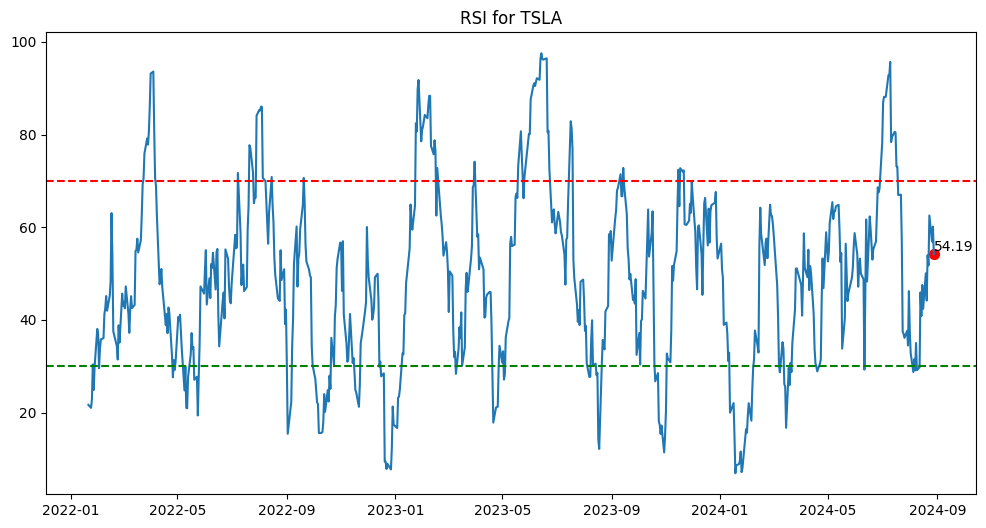

Latest MACD value: -1.668085245338375


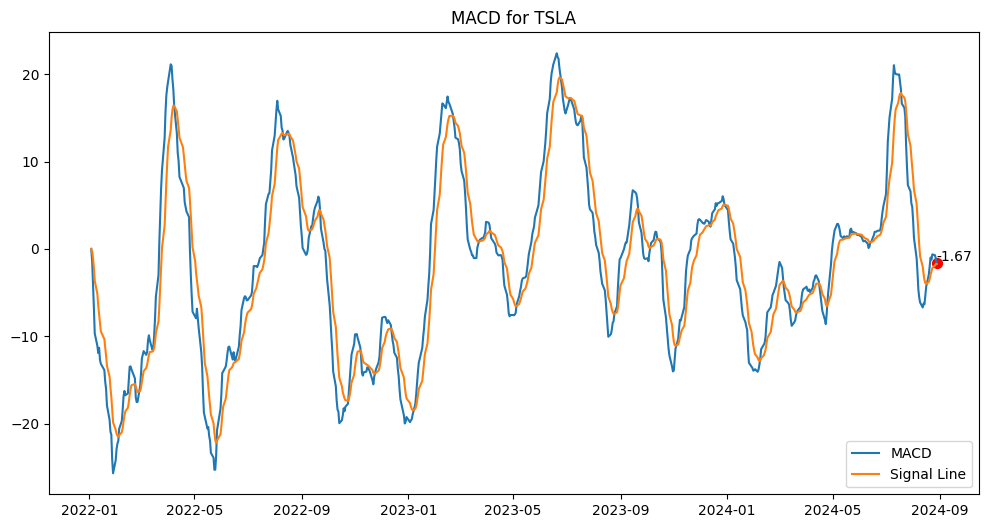

In [ ]:
# prompt: code for relative strength index 14 days for stock tsla and then plot to chart. highlight the latest value with red color. what is the value of the red color. Next code for MACD and plot to chart and show the latest value in red.

!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download historical data for TSLA
df = yf.download('TSLA', start='2022-01-01')

# Calculate RSI
delta = df['Adj Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(rsi)
plt.title('RSI for TSLA')
plt.axhline(y=70, color='r', linestyle='--')
plt.axhline(y=30, color='g', linestyle='--')

# Highlight latest RSI value
latest_rsi = rsi.iloc[-1]
plt.scatter(rsi.index[-1], latest_rsi, color='red', s=50)
plt.text(rsi.index[-1], latest_rsi, f'{latest_rsi:.2f}', color='black', ha='left', va='bottom')
print("Latest RSI value:", latest_rsi)

plt.show()

# Calculate MACD
exp1 = df['Adj Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Adj Close'].ewm(span=26, adjust=False).mean()
macd = exp1 - exp2
signal = macd.ewm(span=9, adjust=False).mean()

# Plot MACD
plt.figure(figsize=(12, 6))
plt.plot(macd, label='MACD')
plt.plot(signal, label='Signal Line')
plt.title('MACD for TSLA')
plt.legend()

# Highlight latest MACD value
latest_macd = macd.iloc[-1]
plt.scatter(macd.index[-1], latest_macd, color='red', s=50)
plt.text(macd.index[-1], latest_macd, f'{latest_macd:.2f}', color='black', ha='left', va='bottom')
print("Latest MACD value:", latest_macd)

plt.show()
